In [1]:
import pandas as pd
import numpy as np
from pathlib import Path

import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

In [2]:
from subprocess import check_output
print(check_output(["ls", "../../resources/prices"]).decode("utf8"))

coin_Aave.csv
coin_BinanceCoin.csv
coin_Bitcoin.csv
coin_Cardano.csv
coin_ChainLink.csv
coin_Cosmos.csv
coin_CryptocomCoin.csv
coin_Dogecoin.csv
coin_EOS.csv
coin_Ethereum.csv
coin_Iota.csv
coin_Litecoin.csv
coin_Monero.csv
coin_NEM.csv
coin_Polkadot.csv
coin_Solana.csv
coin_Stellar.csv
coin_Tether.csv
coin_Tron.csv
coin_USDCoin.csv
coin_Uniswap.csv
coin_WrappedBitcoin.csv
coin_XRP.csv



## Load and inspect data

In [3]:
uni_df = pd.read_csv(Path('../../resources/prices/coin_Uniswap.csv'), index_col='SNo')
uni_df

,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
SNo,,,,,,,,,
1,Uniswap,UNI,2020-09-18 23:59:59,8.438537,3.261757,3.488153,6.897257,6.061110e+09,6.681116e+08
2,Uniswap,UNI,2020-09-19 23:59:59,7.443275,5.321795,6.945577,5.724464,2.447471e+09,5.545076e+08
3,Uniswap,UNI,2020-09-20 23:59:59,6.050326,4.720210,5.720515,5.244195,1.554144e+09,5.079857e+08
4,Uniswap,UNI,2020-09-21 23:59:59,5.622155,4.160743,5.244195,4.266079,1.329464e+09,4.132392e+08
5,Uniswap,UNI,2020-09-22 23:59:59,4.554092,3.755040,4.275014,3.905138,8.162827e+08,3.782762e+08
...,...,...,...,...,...,...,...,...,...
159,Uniswap,UNI,2021-02-23 23:59:59,27.743926,18.534552,27.708213,24.576645,2.670108e+09,7.411839e+09
160,Uniswap,UNI,2021-02-24 23:59:59,27.289320,23.152845,24.651880,25.255146,1.423106e+09,7.617272e+09
161,Uniswap,UNI,2021-02-25 23:59:59,26.837709,23.271170,25.245552,23.271170,9.841518e+08,7.018880e+09


In [4]:
uni_df['Date'] = pd.to_datetime(uni_df['Date']).dt.date
uni_df['Date'] = pd.to_datetime(uni_df['Date'])
uni_df['Spread'] = uni_df.High - uni_df.Low
uni_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 163 entries, 1 to 163
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Name       163 non-null    object        
 1   Symbol     163 non-null    object        
 2   Date       163 non-null    datetime64[ns]
 3   High       163 non-null    float64       
 4   Low        163 non-null    float64       
 5   Open       163 non-null    float64       
 6   Close      163 non-null    float64       
 7   Volume     163 non-null    float64       
 8   Marketcap  163 non-null    float64       
 9   Spread     163 non-null    float64       
dtypes: datetime64[ns](1), float64(7), object(2)
memory usage: 14.0+ KB


## Plot the closing value of UNI over time

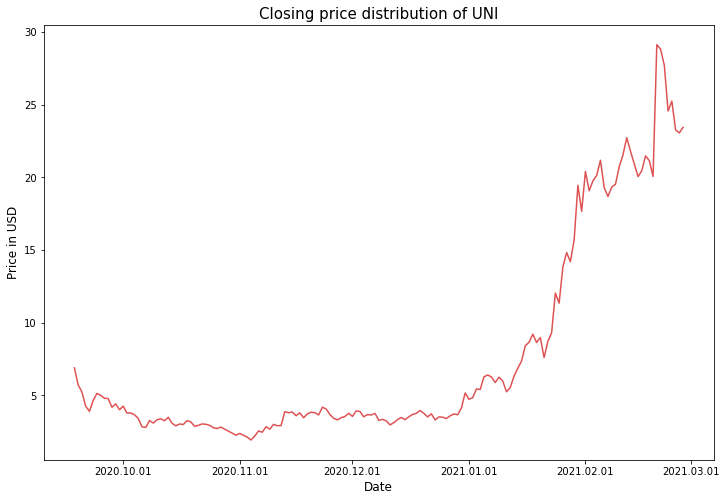

In [5]:
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(12,8))
# sns.lineplot(y = uni_df.Close.values, x=uni_df.Date_mpl.values, alpha=0.8, color=color[3])
sns.lineplot(y = uni_df.Close.values, x=uni_df.Date.values, alpha=0.8, color=color[3])
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y.%m.%d'))
# fig.autofmt_xdate()
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.title("Closing price distribution of UNI", fontsize=15)
plt.show()

## Candlestick chart

In [6]:
import matplotlib.ticker as mticker
# from matplotlib.finance import candlestick_ohlc
import mplfinance as mpf

uni_df['Date_mpl'] = uni_df['Date'].apply(lambda x: mdates.date2num(x))

temp_uni_df = uni_df.copy(deep=False)
temp_uni_df = temp_uni_df.set_index(['Date'])
temp_uni_df = temp_uni_df.drop(['Name', 'Symbol', 'Marketcap','Spread'], axis=1)
temp_uni_df

,High,Low,Open,Close,Volume,Date_mpl
Date,,,,,,
2020-09-18,8.438537,3.261757,3.488153,6.897257,6.061110e+09,18523.0
2020-09-19,7.443275,5.321795,6.945577,5.724464,2.447471e+09,18524.0
2020-09-20,6.050326,4.720210,5.720515,5.244195,1.554144e+09,18525.0
2020-09-21,5.622155,4.160743,5.244195,4.266079,1.329464e+09,18526.0
2020-09-22,4.554092,3.755040,4.275014,3.905138,8.162827e+08,18527.0
...,...,...,...,...,...,...
2021-02-23,27.743926,18.534552,27.708213,24.576645,2.670108e+09,18681.0
2021-02-24,27.289320,23.152845,24.651880,25.255146,1.423106e+09,18682.0
2021-02-25,26.837709,23.271170,25.245552,23.271170,9.841518e+08,18683.0


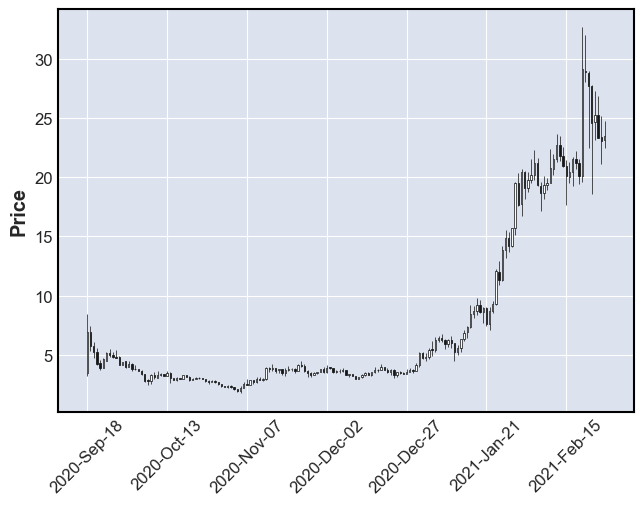

In [7]:
mpf.plot(temp_uni_df, type='candle')

## Price prediction

In [8]:
from fbprophet import Prophet

In [9]:
INPUT_FILE = "coin_Uniswap.csv"

price_predict_df = pd.read_csv("../../resources/prices/" + INPUT_FILE, parse_dates=['Date'], usecols=["Date", "Close"])
price_predict_df.columns = ["ds", "y"]

m = Prophet()
m.fit(price_predict_df);
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
188,2021-03-25 23:59:59,37.779791,35.913273,39.760948
189,2021-03-26 23:59:59,38.321489,36.252338,40.194240
190,2021-03-27 23:59:59,39.080485,37.115633,41.095606
191,2021-03-28 23:59:59,39.535092,37.486067,41.523727
192,2021-03-29 23:59:59,39.768839,37.660168,41.843864


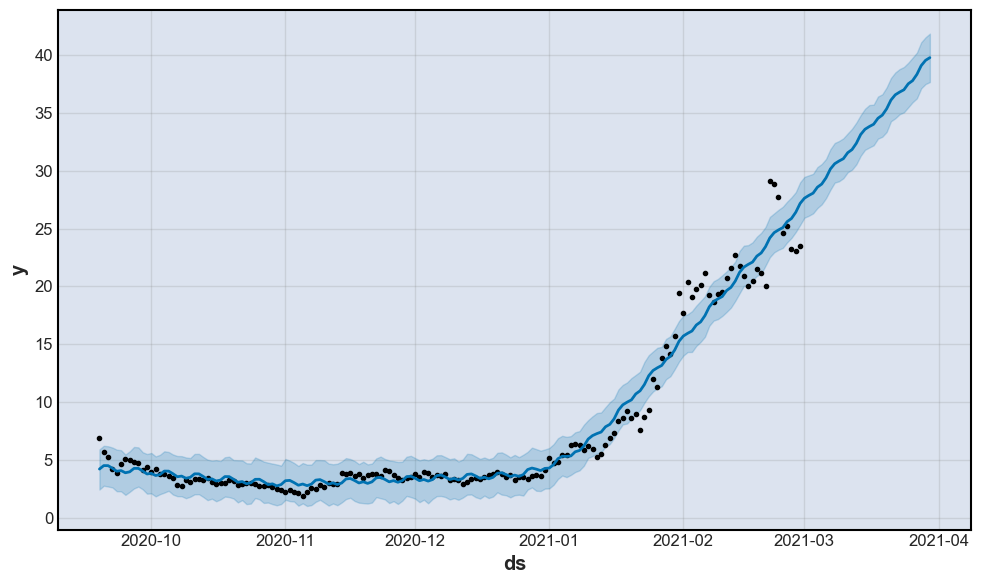

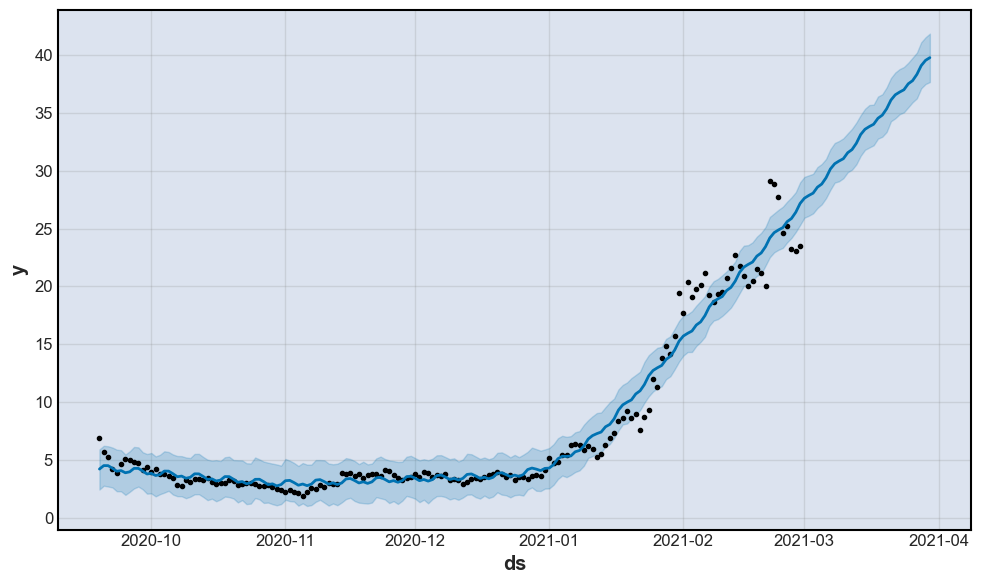

In [10]:
m.plot(forecast)

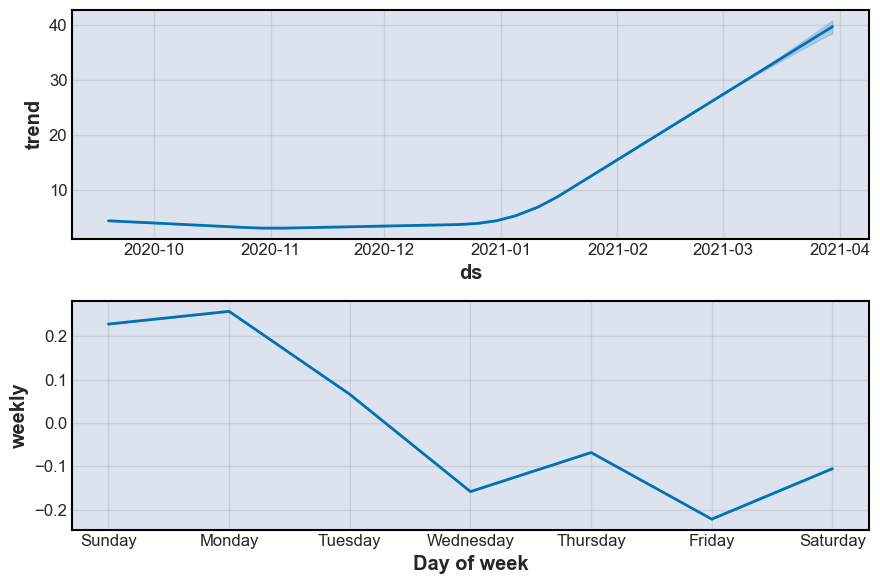

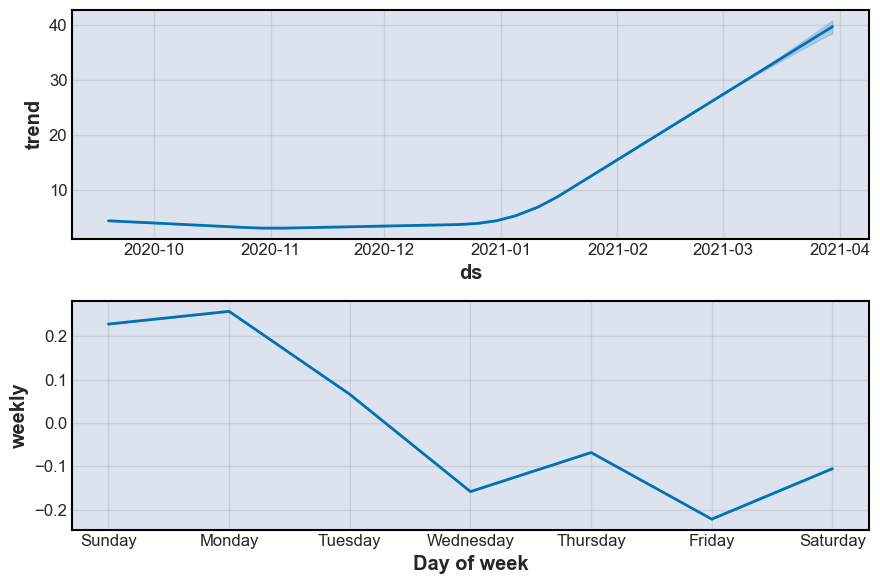

In [11]:
m.plot_components(forecast)